In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [53]:
df = pd.read_csv("std-2015.csv", header = 0)
df.head()

,Unnamed: 0,fix,Pos,G,GS,MP,FG,FGA,FG.,eFG.,...,USG.,OWS,DWS,WS,WS.48,OBPM,DBPM,BPM,VORP,average.salary
0,1,quincyacy,PF,68,22,-0.473474,-0.672140,-0.697105,0.185085,-0.138452,...,-0.698414,-0.335476,-0.753820,-0.531537,-0.525175,-0.758194,-0.419981,-0.904852,-0.798867,789705
1,2,jordanadams,SG,30,0,-1.802068,-1.181297,-1.170703,-0.617125,-0.519812,...,0.282806,-0.818692,-1.033220,-0.989969,-0.351732,-0.543759,0.727328,-0.000378,-0.508714,1404600
2,3,stevenadams,C,70,67,0.328696,-0.213899,-0.507665,1.496391,0.914827,...,-0.938713,0.099419,0.643179,0.314798,0.307352,-0.372211,1.071520,0.361412,0.216668,2423849
3,4,alexisajinca,C,68,8,-1.075102,-0.417562,-0.720785,1.588954,1.023787,...,0.422980,0.099419,-0.288154,-0.002578,1.139880,0.013773,0.383135,0.289054,-0.218561,808482
4,5,furkanaldemir,PF,41,9,-1.187907,-1.283128,-1.407502,1.018150,0.351868,...,-2.080131,-0.480441,-0.753820,-0.637329,0.498140,-0.929743,1.186251,-0.036557,-0.436176,2855153


# Variables
Best Variables from AIC/BIC Models: forwardAIC is most significant:
- FG = Field Goals Per Game
- TOV = Turnovers Per Game
- STL = Steals Per Game
- VORP = Value over replacement player
- G = Number of games played
- USG. = Usage%
- PF = Personal Fouls per Game
- DRB = Defensive Rebounds Per Game
- BLK = Blocks Per Game
- AST = Assists Per Game
- AST. = Assist%
- STL. = Steal%
- WS = Win Shares
- FTA = Free Throw Attempts Per Game

In [55]:
df1 = df[["fix","FG","TOV","STL","VORP","G","USG.","PF","DRB","BLK","AST","AST.","STL.","WS","FTA","average.salary"]]
df1.head()

,fix,FG,TOV,STL,VORP,G,USG.,PF,DRB,BLK,AST,AST.,STL.,WS,FTA,average.salary
0,quincyacy,-0.672140,-0.501897,-0.765082,-0.798867,68,-0.698414,0.471465,0.150216,-0.318555,-0.582762,-0.520707,-0.768873,-0.531537,-0.460583,789705
1,jordanadams,-1.181297,-1.028546,-0.527429,-0.508714,30,0.282806,-1.751927,-1.446275,-0.532602,-0.863655,-0.365981,2.756896,-0.989969,-0.826565,1404600
2,stevenadams,-0.213899,0.156413,-0.527429,0.216668,70,-0.938713,2.059603,0.918897,1.607865,-0.638941,-0.874367,-0.768873,0.314798,0.454372,2423849
3,alexisajinca,-0.417562,-0.370235,-1.002735,-0.218561,68,0.422980,0.471465,0.031958,0.751679,-0.751298,-0.575967,-0.615579,-0.002578,-0.399586,808482
4,furkanaldemir,-1.283128,-1.160208,-0.765082,-0.436176,41,-2.080131,0.630279,-0.381948,-0.104508,-0.751298,-0.564915,-0.002401,-0.637329,-0.887562,2855153


# 2015 Salary Cap: 70,000,000
Now organize players based on % of salary cap
1. < 2% (min)
2. 2-4% (Vet Min)
3. 4-7% (MLE, Bi-annual)
4. 7-10%
5. 10-13%
6. 13-16%
7. 16-19%
8. /> 19% (Maxes)

In [31]:
def salGroup(x):
    yearCap = 70000000
    if x < 0.02*yearCap:
        return 1
    elif x >= 0.02*yearCap and x < 0.04*yearCap:
        return 2
    elif x >= 0.04*yearCap and x < 0.07*yearCap:
        return 3
    elif x >= 0.07*yearCap and x < 0.10*yearCap:
        return 4
    elif x >= 0.10*yearCap and x < 0.13*yearCap:
        return 5
    elif x >= 0.13*yearCap and x < 0.16*yearCap:
        return 6
    elif x >= 0.16*yearCap and x < 0.19*yearCap:
        return 7
    else:
        return 8

In [58]:
cols = df1.columns.drop('fix')
df1[cols] = df1[cols].apply(pd.to_numeric, errors = 'coerce')
df1["Cluster"] = df1['average.salary'].apply(salGroup)
df1 = df1.drop('average.salary',axis=1)
df1.head()

/home/konner/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/konner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,fix,FG,TOV,STL,VORP,G,USG.,PF,DRB,BLK,AST,AST.,STL.,WS,FTA,Cluster
0,quincyacy,-0.672140,-0.501897,-0.765082,-0.798867,68,-0.698414,0.471465,0.150216,-0.318555,-0.582762,-0.520707,-0.768873,-0.531537,-0.460583,1
1,jordanadams,-1.181297,-1.028546,-0.527429,-0.508714,30,0.282806,-1.751927,-1.446275,-0.532602,-0.863655,-0.365981,2.756896,-0.989969,-0.826565,2
2,stevenadams,-0.213899,0.156413,-0.527429,0.216668,70,-0.938713,2.059603,0.918897,1.607865,-0.638941,-0.874367,-0.768873,0.314798,0.454372,2
3,alexisajinca,-0.417562,-0.370235,-1.002735,-0.218561,68,0.422980,0.471465,0.031958,0.751679,-0.751298,-0.575967,-0.615579,-0.002578,-0.399586,1
4,furkanaldemir,-1.283128,-1.160208,-0.765082,-0.436176,41,-2.080131,0.630279,-0.381948,-0.104508,-0.751298,-0.564915,-0.002401,-0.637329,-0.887562,3


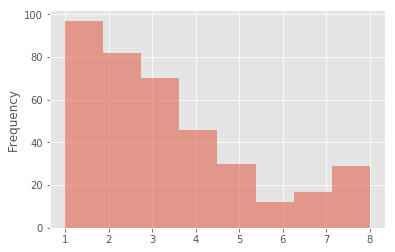

In [59]:
df1['Cluster'].plot.hist(8,alpha=0.5)
plt.show()

In [76]:
df.data = df1.drop(['fix','Cluster'],axis=1)
df.target = df1['Cluster']

In [79]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clsf = DecisionTreeClassifier(random_state=42)
cross_val_score(clsf, df.data, df.target, cv=10)

array([ 0.2195122 ,  0.26829268,  0.30769231,  0.15384615,  0.25641026,
        0.38461538,  0.23684211,  0.19444444,  0.16666667,  0.17142857])

# Use Random Forests to Predict Cluster
## df1 (variables from regular linear regresison)

In [60]:
labels = np.asarray(df1.Cluster)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)

labels = le.transform(labels)
df_features = df1.to_dict(orient='records')

In [61]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
features = vec.fit_transform(df_features).toarray()

In [62]:
##### split up in test and training data ####
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(
	features, labels, 
	test_size=0.33, random_state=42)

In [68]:
#### Fit to random forests ####

# Random Forests Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
	min_samples_split=6,
	criterion="entropy"
	)

In [70]:
clf.fit(features_train, labels_train)

# find the accuracy of the model
acc_test = clf.score(features_test, labels_test)
acc_train = clf.score(features_train, labels_train)
print ("Train Accuracy:", acc_train)
print ("Test Accuracy:", acc_test)

Train Accuracy: 0.97265625
Test Accuracy: 0.622047244094


In [71]:
import pickle 
s = pickle.dumps(clf)
clf2 = pickle.loads(s) # save this classifier

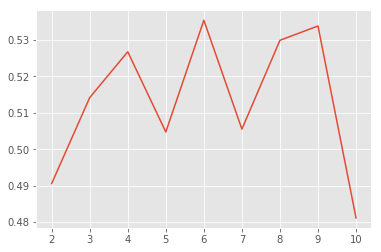

In [67]:
#Plot best splits
acc_tests = [0] * 9
acc_trains = [0] * 9
for e in range(10):
    for i in range(2,11):
        clf = RandomForestClassifier(
        min_samples_split=i,
        criterion="entropy"
        )
        clf.fit(features_train, labels_train)
        acc_tests[i-2] += clf.score(features_test, labels_test)
        acc_trains[i-2] += clf.score(features_train, labels_train)

acc_tests = [x/10 for x in acc_tests]
acc_trains = [x/10 for x in acc_trains]
x = np.arange(2,11,1)
plt.plot(x,acc_tests)
plt.show()

In [72]:
pred = clf2.predict(features_test)
#### Figure out what kind of mistakes it makes ####
from sklearn.metrics import recall_score, precision_score

precision = precision_score(labels_test, pred, average="weighted")
recall = recall_score(labels_test, pred, average="weighted")

print ("Precision:", precision)
print ("Recall:", recall)

Precision: 0.643965303932
Recall: 0.622047244094


/home/konner/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


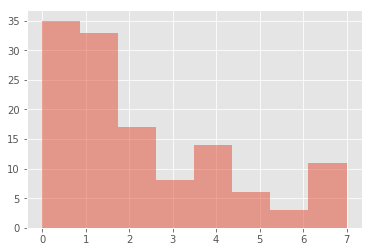

In [73]:
plt.hist(labels_test,8,alpha=0.5)
plt.show()

## df2 (transform)

In [18]:
labels = np.asarray(df2.Cluster)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)

labels = le.transform(labels)
df_features = df2.to_dict(orient='records')

In [19]:
vec = DictVectorizer()
features = vec.fit_transform(df_features).toarray()

In [20]:
features_train, features_test, labels_train, labels_test = train_test_split(
	features, labels, 
	test_size=0.33, random_state=42)

In [21]:
clf = RandomForestClassifier(
	min_samples_split=4,
	criterion="entropy"
	)

In [22]:
clf.fit(features_train, labels_train)

# find the accuracy of the model
acc_test = clf.score(features_test, labels_test)
acc_train = clf.score(features_train, labels_train)
print ("Train Accuracy:", acc_train)
print ("Test Accuracy:", acc_test)

Train Accuracy: 0.984435797665
Test Accuracy: 0.5703125


# Mhmm

In [23]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)

In [24]:
pred = clf2.predict(features_test) + 1 # account for encoding
pred

array([1, 8, 2, 3, 3, 2, 3, 7, 5, 1, 1, 3, 1, 8, 4, 2, 4, 3, 3, 3, 3, 3, 3,
       1, 8, 8, 7, 1, 1, 3, 1, 2, 4, 2, 2, 2, 2, 1, 1, 4, 2, 8, 7, 1, 1, 1,
       3, 8, 7, 1, 2, 2, 2, 4, 1, 4, 2, 1, 1, 4, 5, 1, 5, 4, 1, 2, 3, 7, 3,
       1, 7, 2, 1, 4, 2, 2, 4, 4, 2, 2, 1, 3, 2, 2, 2, 1, 4, 3, 1, 1, 2, 4,
       1, 3, 1, 1, 2, 1, 1, 1, 3, 8, 1, 5, 2, 1, 3, 1, 1, 4, 3, 1, 5, 2, 7,
       1, 1, 8, 7, 2, 2, 4, 3, 8, 7, 3, 3, 3])

In [25]:
df_features

[{'BLK': 0.3,
  'BPM': -3.1,
  'Cluster': 1,
  'DWS': 0.7,
  'FG': 2.2,
  'G': 68,
  'MP': 18.9,
  'STL': 0.4,
  'fix': 'quincyacy'},
 {'BLK': 0.2,
  'BPM': -0.6,
  'Cluster': 2,
  'DWS': 0.4,
  'FG': 1.2,
  'G': 30,
  'MP': 8.3,
  'STL': 0.5,
  'fix': 'jordanadams'},
 {'BLK': 1.2,
  'BPM': 0.4,
  'Cluster': 2,
  'DWS': 2.2,
  'FG': 3.1,
  'G': 70,
  'MP': 25.3,
  'STL': 0.5,
  'fix': 'stevenadams'},
 {'BLK': 0.8,
  'BPM': 0.2,
  'Cluster': 1,
  'DWS': 1.2,
  'FG': 2.7,
  'G': 68,
  'MP': 14.1,
  'STL': 0.3,
  'fix': 'alexisajinca'},
 {'BLK': 0.4,
  'BPM': -0.7,
  'Cluster': 3,
  'DWS': 0.7,
  'FG': 1.0,
  'G': 41,
  'MP': 13.2,
  'STL': 0.4,
  'fix': 'furkanaldemir'},
 {'BLK': 1.1,
  'BPM': 0.9,
  'Cluster': 1,
  'DWS': 1.4,
  'FG': 2.4,
  'G': 61,
  'MP': 16.0,
  'STL': 0.6,
  'fix': 'colealdrich'},
 {'BLK': 1.0,
  'BPM': 0.3,
  'Cluster': 7,
  'DWS': 3.7,
  'FG': 9.3,
  'G': 71,
  'MP': 35.4,
  'STL': 0.7,
  'fix': 'lamarcusaldridge'},
 {'BLK': 0.7,
  'BPM': 0.8,
  'Cluster': 1,
  '

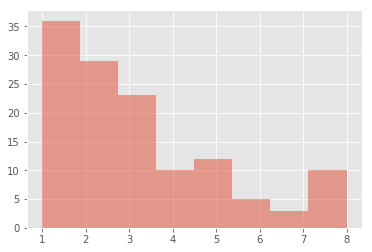

In [26]:
plt.hist(labels_test+1,8,alpha=0.5) # account for encoding
plt.show()

In [27]:
df2.head()

,fix,FG,MP,BPM,DWS,STL,BLK,G,Cluster
0,quincyacy,2.2,18.9,-3.1,0.7,0.4,0.3,68,1
1,jordanadams,1.2,8.3,-0.6,0.4,0.5,0.2,30,2
2,stevenadams,3.1,25.3,0.4,2.2,0.5,1.2,70,2
3,alexisajinca,2.7,14.1,0.2,1.2,0.3,0.8,68,1
4,furkanaldemir,1.0,13.2,-0.7,0.7,0.4,0.4,41,3


In [28]:
# predict our new player [FG,MP,BPM,DWS,STL,BLK,G]
player = [[2.2,18.9,-3.1,0.7,0.4,0.3,68]]
class_code = clf.predict(player) # [1]

decoded_class = le.inverse_transform(class_code)
print (decoded_class)

ValueError: Number of features of the model must match the input. Model n_features is 393 and input n_features is 7 